# **Proyecto Final: Análisis de Datos - MITIC**

#### **Alumno:** Lucca Emilio Estigarribia Macchi

#### **Dataset elegido**: Global Electronics Retailer

---
# **📚 Librerias**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

---
# **Fase 1: Selección y Preparación de Datos**
---

## 📂 Importación de data sets y vista general de los mismos

In [4]:
## Importar DF principal ##
df_sales = pd.read_csv("raw/Sales.csv")
print("=========Data frame de Sales:=========\n")
print("Informacion:\n")
print(df_sales.info())
print("Estadisticas descriptivas:\n")
display(df_sales.describe())
print("Primeros cinco resultados:\n")
display(df_sales.head())
## Order Date y Delivery Date con tipo de dato Object

## Importar DF secundarios ##
"""
Nota en cuanto a la importación del dataset Customers:
No pude cargar el dataset de Customers de la manera en la que cargue los otros datasets, ya que me daba error. El motivo es la codificacion del archivo, 
donde en internet se mencionaba que 0xf6 podria significar que el archivo estaba codificado en latin-1, motivo por el cual probe con dicha codificacion y funcionó. 
Tambien vi resultados que mencionaban el uso de la libreria #chardet, que detecta la codificacion automaticamente, pero no fue necesaria su utilizacion en esta ocasion.
"""
df_customers = pd.read_csv("raw/Customers.csv", encoding='latin-1')
print("=========Data frame de Customers:=========\n")
print("Informacion:\n")
display(df_customers.info())
print("Estadisticas descriptivas:\n")
display(df_customers.describe())
print("Primeros cinco resultados:\n")
display(df_customers.head())
##Birthday con tipo de dato Object

df_data_dictionary = pd.read_csv("raw/Data_Dictionary.csv")
print("=========Data frame de Data_Dictionary:=========\n")
print("Informacion:\n")
display(df_data_dictionary.info())
print("Estadisticas descriptivas:\n")
display(df_data_dictionary.describe())
print("Primeros cinco resultados:\n")
display(df_data_dictionary.head())

df_products = pd.read_csv("raw/Products.csv")
print("=========Data frame de Products:=========\n")
print("Informacion:\n")
display(df_products.info())
print("Estadisticas descriptivas:\n")
display(df_products.describe())
print("Primeros cinco resultados:\n")
display(df_products.head())
## Unit Cost USD y Unit Price USD con dato Object

df_stores = pd.read_csv("raw/Stores.csv")
print("=========Data frame de Stores:=========\n")
print("Informacion:\n")
display(df_stores.info())
print("Estadisticas descriptivas:\n")
display(df_stores.describe())
print("Primeros cinco resultados:\n")
display(df_stores.head())
## Open Date con tipo de dato Object

=========Data frame de Sales:=========

Informacion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None
Estadisticas descriptivas:



,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


Primeros cinco resultados:



,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


=========Data frame de Customers:=========

Informacion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


None

Estadisticas descriptivas:



,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


Primeros cinco resultados:



,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


=========Data frame de Data_Dictionary:=========

Informacion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        37 non-null     object
 1   Field        37 non-null     object
 2   Description  37 non-null     object
dtypes: object(3)
memory usage: 1016.0+ bytes


None

Estadisticas descriptivas:



,Table,Field,Description
count,37,37,37
unique,5,32,37
top,Products,State,Cost to produce the product in USD
freq,10,2,1


Primeros cinco resultados:



,Table,Field,Description
0,Sales,Order Number,Unique ID for each order
1,Sales,Line Item,Identifies individual products purchased as pa...
2,Sales,Order Date,Date the order was placed
3,Sales,Delivery Date,Date the order was delivered
4,Sales,CustomerKey,Unique key identifying which customer placed t...


=========Data frame de Products:=========

Informacion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


None

Estadisticas descriptivas:



,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


Primeros cinco resultados:



,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


=========Data frame de Stores:=========

Informacion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


None

Estadisticas descriptivas:



,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


Primeros cinco resultados:



,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


#### Se verifica lo siguiente:
- df_sales: Order Date y Delivery Date con tipo de dato Object
- df_customers: Birthday con tipo de dato Object
- df_products: Unit Cost USD y Unit Price USD con dato Object
- df_stores: Open Date con tipo de dato Object

---
## 👀 Vista general a los valores nulos de los Data Frames
<u>Objetivo:</u>
Identificar la presencia de valores nulos en cada uno de los datasets para evaluar la calidad de los datos y tomar decisiones informadas sobre su tratamiento posterior (imputación, eliminación o análisis de impacto).

<u>Metodología:</u>
Se implementa una función personalizada analizar_nulos() que permite inspeccionar de manera rápida y clara:
* La cantidad total de valores nulos por columna.
* El porcentaje de valores nulos en relación al total de filas del dataset.
* Se omiten las columnas sin nulos para enfocarse únicamente en aquellas que requieren atención.

Esto permite detectar de forma eficiente qué variables podrían afectar los análisis posteriores y dónde podría ser necesario aplicar técnicas de limpieza o imputación.

In [5]:
## Funcion para verificar valores nulos:
def analizar_nulos(df, nombre):
    """
    Analiza la cantidad y porcentaje de valores nulos en un data frame.
    
    Parámetros:
    - df: data frame a analizar.
    - nombre: Nombre del dataset para la impresión.
    """
    total_filas = df.shape[0]  ## Total de filas del dataset
    valores_nulos = df.isnull().sum()  ## Suma de valores nulos por columna
    porcentaje_nulos = (valores_nulos / total_filas * 100).round(2).sort_values(ascending=False)  ## Porcentaje
    
    print(f"\n========= Verificación de valores nulos en {nombre} =========")
    print(f"Cantidad de filas: {total_filas}")
    print(f"Cantidad de valores nulos por columna:\n{valores_nulos[valores_nulos > 0]}") ## Si es 0 que no muestre
    print(f"\nPorcentaje de valores nulos por columna:\n{porcentaje_nulos[porcentaje_nulos > 0]}\n")

## Aplicamos la función a cada dataset
analizar_nulos(df_sales, "Sales")
analizar_nulos(df_customers, "Customers")
analizar_nulos(df_products, "Products")
analizar_nulos(df_stores, "Stores")
analizar_nulos(df_data_dictionary, "Data Dictionary")


========= Verificación de valores nulos en Sales =========
Cantidad de filas: 62884
Cantidad de valores nulos por columna:
Delivery Date    49719
dtype: int64

Porcentaje de valores nulos por columna:
Delivery Date    79.06
dtype: float64


========= Verificación de valores nulos en Customers =========
Cantidad de filas: 15266
Cantidad de valores nulos por columna:
State Code    10
dtype: int64

Porcentaje de valores nulos por columna:
State Code    0.07
dtype: float64


========= Verificación de valores nulos en Products =========
Cantidad de filas: 2517
Cantidad de valores nulos por columna:
Series([], dtype: int64)

Porcentaje de valores nulos por columna:
Series([], dtype: float64)


========= Verificación de valores nulos en Stores =========
Cantidad de filas: 67
Cantidad de valores nulos por columna:
Square Meters    1
dtype: int64

Porcentaje de valores nulos por columna:
Square Meters    1.49
dtype: float64


========= Verificación de valores nulos en Data Dictionary =========

#### Porcentaje de valores nulos, resumen: 
- df_sales: Delivery Date: 79.06 %
- df_stores: Square Meters: 1.49 %
- df_customers: State Code: 0.07 %
- df_products: 0%
- df_data_dictionary: 0%

----
## **🗓️ Trabajando con fechas**
<u>Objetivo:</u> Verificar y transformar las columnas de fechas de diferentes datasets, asegurando un formato adecuado para su posterior análisis temporal. Además, se crearán nuevas columnas que permitan desglosar la información por año, mes, día y nombre del mes para facilitar futuros análisis de tendencias y estacionalidad.

### 1. Trabajando con df_sales

#### 🔍 Revisión inicial de las fechas en df_sales

In [6]:
## Verificacion del formato original del dataset:
print(f"Primeros 5 valores:\n{df_sales['Order Date'].head()}") ## Verificacion de los primeros 5 valores - explorando
print(f"\nUltimos 5 valores: \n{df_sales['Order Date'].tail()}") ## Verificacion de los ultimos 5 valores - explorando

## Verificando la existencia de valores con algun formato diferente o error
print(f"\nVerificar registros unicos:\n{df_sales['Order Date'].unique()}\n")
print(f"\nContar registros iguales:\n{df_sales['Order Date'].value_counts()}")

Primeros 5 valores:
0    1/1/2016
1    1/1/2016
2    1/1/2016
3    1/1/2016
4    1/1/2016
Name: Order Date, dtype: object

Ultimos 5 valores: 
62879    2/20/2021
62880    2/20/2021
62881    2/20/2021
62882    2/20/2021
62883    2/20/2021
Name: Order Date, dtype: object

Verificar registros unicos:
['1/1/2016' '1/2/2016' '1/3/2016' ... '2/18/2021' '2/19/2021' '2/20/2021']


Contar registros iguales:
12/21/2019    222
1/4/2020      219
12/28/2019    215
12/29/2018    206
2/22/2020     204
             ... 
6/19/2016       1
8/19/2018       1
9/10/2017       1
12/4/2016       1
7/17/2016       1
Name: Order Date, Length: 1641, dtype: int64


#### ⚙️ Conversión de columnas de fechas a formato datetime

In [7]:
## ORDER DATE ##
## Convertir Order Date de tipo de dato object a date time:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], errors = 'coerce') ## Con coerce forzamos la conversión y asignamos NaT a cualquier valor erróneo o inválido detectado
df_sales.info()

## Creacion de columnas para tener mejor identificado los meses, anhos y dias.
df_sales['mes_OD'] = df_sales['Order Date'].dt.month ## mes_OD = mes Order Date, lo mismo aplica para los siguientes
df_sales['anho_OD'] = df_sales['Order Date'].dt.year
df_sales['dia_OD'] = df_sales['Order Date'].dt.day_name()
df_sales['nombre_mes_OD'] = df_sales['Order Date'].dt.month_name()

## DELIVERY DATE ##
## Convertir Delivery Date de tipo de dato object a date time:
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], errors = 'coerce')
df_sales.info()

## Creacion de columnas para tener mejor identificado los meses, anhos y dias.
df_sales['mes_DD'] = df_sales['Delivery Date'].dt.month ## mes_DD = mes Delivery Date, lo mismo aplica para los siguientes
df_sales['anho_DD'] = df_sales['Delivery Date'].dt.year
df_sales['dia_DD'] = df_sales['Delivery Date'].dt.day_name()
df_sales['nombre_mes_DD'] = df_sales['Delivery Date'].dt.month_name()

display(df_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  object        
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,mes_OD,anho_OD,dia_OD,nombre_mes_OD,mes_DD,anho_DD,dia_DD,nombre_mes_DD
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,1,2016,Friday,January,NaN,NaN,NaN,NaN
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,1,2016,Friday,January,1.0,2016.0,Wednesday,January
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,1,2016,Friday,January,1.0,2016.0,Wednesday,January
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,1,2016,Friday,January,1.0,2016.0,Tuesday,January
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,1,2016,Friday,January,1.0,2016.0,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,NaT,1216913,43,632,3,USD,2,2021,Saturday,February,NaN,NaN,NaN,NaN
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,2,2021,Saturday,February,2.0,2021.0,Wednesday,February
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,2,2021,Saturday,February,2.0,2021.0,Tuesday,February
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,2,2021,Saturday,February,2.0,2021.0,Tuesday,February


----
### 2. Trabajando con df_customer

#### 🔍 Revisión inicial de las fechas en df_customer

In [8]:
## Verificacion del formato original del dataset:
print(f"Primeros 5 valores:\n{df_customers['Birthday'].head()}") ## Verificacion de los primeros 5 valores - explorando
print(f"\nUltimos 5 valores: \n{df_customers['Birthday'].tail()}") ## Verificacion de los ultimos 5 valores - explorando

## Verificando la existencia de valores con algun formato diferente o error
print(f"\nVerificar registros unicos:\n{df_customers['Birthday'].unique()}\n")
print(f"\nContar registros iguales:\n{df_customers['Birthday'].value_counts()}")

Primeros 5 valores:
0      7/3/1939
1     9/27/1979
2     5/26/1947
3     9/17/1957
4    11/19/1965
Name: Birthday, dtype: object

Ultimos 5 valores: 
15261     3/25/1936
15262     2/16/1992
15263     11/9/1937
15264    10/12/1937
15265     8/18/1965
Name: Birthday, dtype: object

Verificar registros unicos:
['7/3/1939' '9/27/1979' '5/26/1947' ... '3/25/1936' '11/9/1937'
 '8/18/1965']


Contar registros iguales:
6/12/1989     5
8/4/1943      5
5/29/1965     5
7/3/1944      5
9/22/1951     5
             ..
10/30/1945    1
5/29/1937     1
3/28/1945     1
4/4/1940      1
5/1/1980      1
Name: Birthday, Length: 11270, dtype: int64


#### ⚙️ Conversión de columnas de fechas a formato datetime

In [9]:
## Birthday ##
## Convertir Birthday de tipo de dato object a date time:
df_customers['Birthday'] = pd.to_datetime(df_customers['Birthday'], errors = 'coerce')
df_customers.info()

## Creacion de columnas para tener mejor identificado los meses, anhos y dias.
df_customers['mes'] = df_customers['Birthday'].dt.month
df_customers['anho'] = df_customers['Birthday'].dt.year
df_customers['dia'] = df_customers['Birthday'].dt.day_name()
df_customers['nombre_mes'] = df_customers['Birthday'].dt.month_name()

display(df_customers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15256 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,mes,anho,dia,nombre_mes
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,7,1939,Monday,July
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,9,1979,Thursday,September
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,5,1947,Monday,May
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,9,1957,Tuesday,September
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,11,1965,Friday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,3,1936,Wednesday,March
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,2,1992,Sunday,February
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,11,1937,Tuesday,November
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,10,1937,Tuesday,October


-----
### 3. Trabajando con df_stores

#### 🔍 Revisión inicial de las fechas en df_stores

In [10]:
## Verificacion del formato original del dataset:
print(f"Primeros 5 valores:\n{df_stores['Open Date'].head()}") ## Verificacion de los primeros 5 valores - explorando
print(f"\nUltimos 5 valores: \n{df_stores['Open Date'].tail()}") ## Verificacion de los ultimos 5 valores - explorando

## Verificando la existencia de valores con algun formato diferente o error
print(f"\nVerificar registros unicos:\n{df_stores['Open Date'].unique()}\n")
print(f"\nContar registros iguales:\n{df_stores['Open Date'].value_counts()}")

Primeros 5 valores:
0     1/1/2008
1    1/12/2008
2     1/7/2012
3     1/1/2010
4    12/9/2015
Name: Open Date, dtype: object

Ultimos 5 valores: 
62    3/6/2008
63    1/1/2010
64    1/1/2012
65    1/1/2014
66    1/1/2010
Name: Open Date, dtype: object

Verificar registros unicos:
['1/1/2008' '1/12/2008' '1/7/2012' '1/1/2010' '12/9/2015' '5/7/2007'
 '7/2/2014' '3/4/2005' '4/4/2015' '6/3/2009' '6/6/2012' '6/7/2013'
 '12/15/2009' '1/1/2015' '6/3/2010' '7/8/2007' '8/8/2012' '12/15/2012'
 '6/3/2018' '3/6/2008' '3/5/2019' '8/8/2008' '4/4/2005' '1/1/2012'
 '1/1/2014']


Contar registros iguales:
1/1/2010      9
12/15/2012    5
4/4/2015      4
6/3/2009      3
6/3/2010      3
6/3/2018      3
6/6/2012      3
12/15/2009    3
1/1/2015      3
6/7/2013      3
3/6/2008      3
7/8/2007      3
8/8/2012      3
3/4/2005      2
1/1/2008      2
1/12/2008     2
5/7/2007      2
1/7/2012      2
12/9/2015     2
7/2/2014      2
3/5/2019      1
4/4/2005      1
1/1/2014      1
8/8/2008      1
1/1/2012      1
Nam

#### ⚙️ Conversión de columnas de fechas a formato datetime

In [11]:
## Open Date ##
## Convertir Open Date de tipo de dato object a date time:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], errors = 'coerce')
df_stores.info()

## Creacion de columnas para tener mejor identificado los meses, anhos y dias.
df_stores['mes'] = df_stores['Open Date'].dt.month
df_stores['anho'] = df_stores['Open Date'].dt.year
df_stores['dia'] = df_stores['Open Date'].dt.day_name()
df_stores['nombre_mes'] = df_stores['Open Date'].dt.month_name()

display(df_stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  66 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


,StoreKey,Country,State,Square Meters,Open Date,mes,anho,dia,nombre_mes
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,1,2008,Tuesday,January
1,2,Australia,Northern Territory,665.0,2008-01-12,1,2008,Saturday,January
2,3,Australia,South Australia,2000.0,2012-01-07,1,2012,Saturday,January
3,4,Australia,Tasmania,2000.0,2010-01-01,1,2010,Friday,January
4,5,Australia,Victoria,2000.0,2015-12-09,12,2015,Wednesday,December
...,...,...,...,...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06,3,2008,Thursday,March
63,64,United States,Washington DC,1330.0,2010-01-01,1,2010,Friday,January
64,65,United States,West Virginia,1785.0,2012-01-01,1,2012,Sunday,January
65,66,United States,Wyoming,840.0,2014-01-01,1,2014,Wednesday,January


---
## 💵 **Limpieza y conversión de moneda en df_products**
<u>Objetivo:</u> Asegurar que las columnas relacionadas con valores monetarios (Unit Cost USD y Unit Price USD) estén correctamente formateadas como tipo de dato float. Esto permitirá realizar cálculos y análisis estadísticos sin problemas de formato en el futuro.

<u>Metodología: Limpieza y Conversión</u>

Se desarrolla la función conversion_de_monedas() que realiza el siguiente proceso fila por fila:

* Eliminación del símbolo de dólar y espacios innecesarios ($, espacios en blanco).
* Eliminación de cualquier texto adicional (como 'USD').
* Eliminación de comas que representan separadores de miles.
* Conversión segura a float, para dejar las columnas listas para el análisis numérico.

In [12]:
## Verificacion del dataset con la columna UNIT COST USD
display(df_products.head(10) )
display(df_products['Unit Cost USD'].unique())
display(df_products['Unit Cost USD'].value_counts())

## No se verifican resultados fuera de lo comun ##

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
5,6,Contoso 2G MP3 Player E200 Black,Contoso,Black,$11.00,$21.57,101,MP4&MP3,1,Audio
6,7,Contoso 2G MP3 Player E200 Blue,Contoso,Blue,$11.00,$21.57,101,MP4&MP3,1,Audio
7,8,Contoso 4G MP3 Player E400 Silver,Contoso,Silver,$30.58,$59.99,101,MP4&MP3,1,Audio
8,9,Contoso 4G MP3 Player E400 Black,Contoso,Black,$30.58,$59.99,101,MP4&MP3,1,Audio
9,10,Contoso 4G MP3 Player E400 Green,Contoso,Green,$30.58,$59.99,101,MP4&MP3,1,Audio


array(['$6.62 ', '$7.40 ', '$11.00 ', '$30.58 ', '$35.72 ', '$50.56 ',
       '$61.62 ', '$91.93 ', '$84.49 ', '$48.92 ', '$99.14 ', '$106.69 ',
       '$76.45 ', '$91.95 ', '$98.07 ', '$79.53 ', '$83.24 ', '$13.10 ',
       '$22.05 ', '$17.45 ', '$18.65 ', '$45.98 ', '$49.69 ', '$34.36 ',
       '$55.18 ', '$52.88 ', '$61.16 ', '$82.83 ', '$86.67 ', '$61.17 ',
       '$128.76 ', '$73.11 ', '$101.97 ', '$160.93 ', '$229.93 ',
       '$152.94 ', '$960.82 ', '$392.60 ', '$216.12 ', '$505.85 ',
       '$527.53 ', '$389.26 ', '$54.72 ', '$35.18 ', '$59.32 ', '$50.13 ',
       '$45.53 ', '$55.99 ', '$45.83 ', '$43.04 ', '$53.76 ', '$58.36 ',
       '$29.01 ', '$33.65 ', '$275.46 ', '$321.44 ', '$152.44 ',
       '$293.85 ', '$137.60 ', '$152.90 ', '$261.66 ', '$252.47 ',
       '$316.85 ', '$264.72 ', '$367.43 ', '$266.26 ', '$167.73 ',
       '$294.54 ', '$208.52 ', '$197.28 ', '$224.87 ', '$155.89 ',
       '$183.49 ', '$101.46 ', '$243.27 ', '$244.72 ', '$183.54 ',
       '$229.47 ', '$1

$15.29      34
$321.44     29
$210.72     29
$52.00      28
$152.94     27
            ..
$303.05      1
$23.86       1
$496.98      1
$404.63      1
$408.36      1
Name: Unit Cost USD, Length: 480, dtype: int64

In [13]:
def conversion_de_monedas (df, columna):
    for i, precio in enumerate(df[columna]):    

        ## Paso 1: Quitar el símbolo de moneda y espacios
        precio_limpio = precio.replace('$', '').strip() 
        ## Reemplazamos el simbolo del dolar por vacio y con strip quitamos el espacio

        ## Paso 2: Quitar las letras (como USD)
        precio_limpio = re.sub(r'[A-Za-z]', '', precio_limpio) 
        ## Reemplazamos letras por vacio
        
        ## Paso 3: Quitar las comas
        precio_limpio = precio_limpio.replace(',', '') 
        ## Comas por vacio: Para separador de miles se usa la coma, para el seperador de decimales se usa el punto.
        
        ## Paso 4: Convertir a tipo de dato flotante, considerando que la moneda es dolar
        try:
            precio_numero = float(precio_limpio)
            df.loc[i, columna] = precio_numero
            ## Del dataset localizamos el indice actual (i) de la columna para convertir el valor de esa fila/columna a el valor actual 
            ## de la variable precio_numero
        except:
            print("No se pudo convertir a número")

conversion_de_monedas(df_products, 'Unit Cost USD')
conversion_de_monedas(df_products, 'Unit Price USD')
display(df_products)


,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.4,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


Después de la limpieza, se realiza una conversión explícita de las columnas al tipo de dato float, asegurando que todo quedó correctamente formateado:

In [14]:
display(df_products.info())
## Realizando codigos me percate de que la funcion creada no cambiaba finalmente el tipo de dato, por lo que luego de verificar varias alternativas 
## finalmente quede con la solucion mas simple.
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].astype(float)
display(df_products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


None

---
## **🧹 Tratamiento de Valores Nulos**
<u>Objetivo:</u> Identificar la magnitud y el comportamiento de los valores faltantes en distintas columnas, entender sus posibles causas y aplicar una estrategia de imputación adecuada, que minimice la pérdida de información y mantenga la coherencia de los datos.

<u>Datasets y columnas a analizar:</u>
* df_sales: Delivery Date: 79.06 %
* df_stores: Square Meters: 1.49 %
* df_customers: State Code: 0.07 %
* df_products: 0%
* df_data_dictionary: 0%

### **1. DF: df_sales**

#### 🔎 Análisis Inicial: Explorando la Distribución de los Nulos

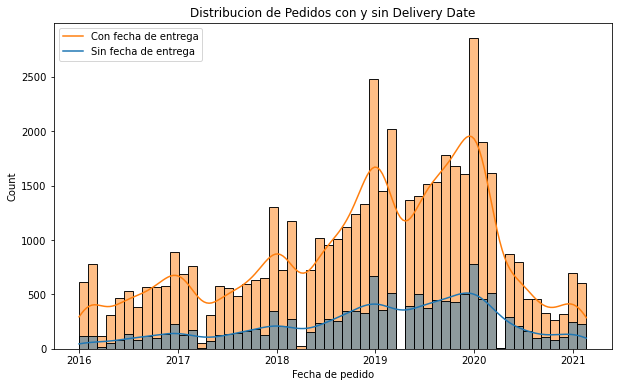

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_sales,
             x= 'Order Date',
             hue= df_sales['Delivery Date'].isnull(),
             kde= True)
plt.title('Distribucion de Pedidos con y sin Delivery Date')
plt.xlabel('Fecha de pedido')
plt.legend(['Con fecha de entrega', 'Sin fecha de entrega'])
plt.show()

El gráfico muestra que las fechas con mayor volumen de pedidos también son las que concentran más valores faltantes en Delivery Date. Esto sugiere que, durante los picos de ventas, el sistema o los empleados pueden verse sobrecargados y no se registran correctamente las fechas de entrega, así como también que el producto fue retirado de tienda.

#### 🕒 Cálculo del Tiempo de Entrega e imputación
Se calcula la cantidad de días entre la fecha del pedido (Order Date) y la fecha de entrega (Delivery Date) para entender el comportamiento habitual de las entregas y preparar la imputación.
* Se observa que la mayoría de las entregas se realizan entre 3 y 5 días.
* Se detectan valores atípicos a través del rango intercuartílico (IQR) para evaluar si afectan la decisión de imputación.
* Se revisa la moda, la mediana y la media de los tiempos de entrega.

In [16]:
## Calcular la cantidad de días entre un pedido y la entrega
df_sales['Delivery Time'] = (df_sales['Delivery Date'] - df_sales['Order Date']).dt.days
print(df_sales[['Order Date', 'Delivery Date', 'Delivery Time']].head(10))

  Order Date Delivery Date  Delivery Time
0 2016-01-01           NaT            NaN
1 2016-01-01    2016-01-13           12.0
2 2016-01-01    2016-01-13           12.0
3 2016-01-01    2016-01-12           11.0
4 2016-01-01    2016-01-12           11.0
5 2016-01-01    2016-01-12           11.0
6 2016-01-01           NaT            NaN
7 2016-01-01           NaT            NaN
8 2016-01-01           NaT            NaN
9 2016-01-01           NaT            NaN


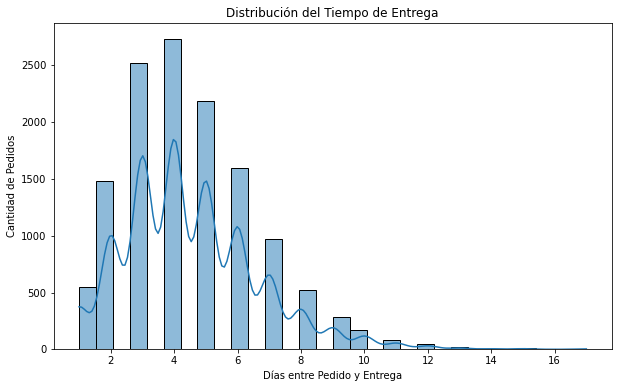

In [17]:
## Gráfico para visualizar mejor la cantidad de entregas que se realizan en un plazo X de días ##
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['Delivery Time'].dropna(), bins=30, kde=True)
plt.title('Distribución del Tiempo de Entrega')
plt.xlabel('Días entre Pedido y Entrega')
plt.ylabel('Cantidad de Pedidos')
plt.show()

* Se observa que la mayoría de las entregas se realizan entre 3 y 5 días.

In [18]:
# Ver un resumen más útil: valores mínimos, máximos y más comunes
print(df_sales['Delivery Time'].describe())
print("\nValores más comunes:")
print(df_sales['Delivery Time'].value_counts().head(10)) # Top 10 valores más repetidos

moda_entrega = df_sales['Delivery Time'].mode()[0]
mediana_entrega = df_sales['Delivery Time'].median()

count    13165.000000
mean         4.529130
std          2.121071
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         17.000000
Name: Delivery Time, dtype: float64

Valores más comunes:
4.0     2735
3.0     2518
5.0     2189
6.0     1592
2.0     1480
7.0      967
1.0      549
8.0      519
9.0      280
10.0     173
Name: Delivery Time, dtype: int64


In [19]:
## Cálculo del rango intercuartílico para verificación de outliers ##
Q1 = df_sales['Delivery Time'].quantile(0.25)
Q3 = df_sales['Delivery Time'].quantile(0.75)
IQR = Q3 - Q1 ## Cálculo del rango intercuartílico
## Guiándonos por el describe ejecutado más arriba podemos determinar de antemano que Q1 es 3 y Q3 es 6.
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f"Rango intercuartílico: {IQR}\nLímite inferior: {limite_inferior}\nLímite superior: {limite_superior}")

Rango intercuartílico: 3.0
Límite inferior: -1.5
Límite superior: 10.5


In [20]:
## Verificación de outliers: ##
df_sales_DT_outliers = df_sales[df_sales['Delivery Time'] > limite_superior]
print(f"Verificación de outliers:\n{df_sales_DT_outliers['Delivery Time'].value_counts()}\nCantidad total: {df_sales_DT_outliers['Delivery Time'].value_counts().sum()}")

Verificación de outliers:
11.0    81
12.0    45
13.0    17
15.0     8
14.0     7
17.0     5
Name: Delivery Time, dtype: int64
Cantidad total: 163


* Se detectan valores atípicos a través del rango intercuartílico (IQR) para evaluar si afectan la decisión de imputación.

In [21]:
## Verificación de la moda y la mediana ##
moda_entrega = df_sales['Delivery Time'].mode()[0]
mediana_entrega = df_sales['Delivery Time'].median()
media_entrega = df_sales['Delivery Time'].mean()
print(f"La moda es: {moda_entrega}")
print(f"La mediana es: {mediana_entrega} días")
print(f"El promedio es: {media_entrega}")

La moda es: 4.0
La mediana es: 4.0 días
El promedio es: 4.529130269654386


* Se revisa la moda, la mediana y la media de los tiempos de entrega.

Considerando la existencia de outliers, considero mejor imputarlos con la mediana. Si bien el valor de la media no se aleja demasiado a los mencionados anteriormente, prefiero continuar con el 4, considerando la gran cantidad de entregas que se producen a los 4 días.

In [22]:
## Completamos los valores nulos con la mediana de los datos de la columna Delivery Time agrupados por año y mes:
df_sales['Delivery Time'] = df_sales.groupby(['anho_OD', 'mes_OD'])['Delivery Time'].transform(lambda x: x.fillna(x.median()))

## Crear Delivery Date sumando Delivery Time a Order Date
df_sales['Delivery Date'] = df_sales['Order Date'] + pd.to_timedelta(df_sales['Delivery Time'], unit='D')
                                                    ## Convertimos 'Delivery Time' al tipo de dato TimeDelta64, dejándolo en días
                                                    ## Esto permitirá realizar la suma de X cantidad de días a Order Date para completar los valores NaT de DD

## Verificar si quedan valores nulos en Delivery Date
print(df_sales['Delivery Date'].isnull().sum())

0


<u>Verificaciones finales</u>

In [23]:
## Verificar nuevamente con .info() para notar que existen aún valores nulos con las columnas creadas de 'Delivery Date' antes de la conversión ##
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
 9   mes_OD         62884 non-null  int64         
 10  anho_OD        62884 non-null  int64         
 11  dia_OD         62884 non-null  object        
 12  nombre_mes_OD  62884 non-null  object        
 13  mes_DD         13165 non-null  float64       
 14  anho_DD        13165 non-null  float64       
 15  dia_DD         1316

In [24]:
## Volvemos a ejecutar el código utilizado anteriormente para la creación de la columna ##
df_sales['mes_DD'] = df_sales['Delivery Date'].dt.month ## mes_DD = mes Delivery Date, lo mismo aplica para los siguientes
df_sales['anho_DD'] = df_sales['Delivery Date'].dt.year
df_sales['dia_DD'] = df_sales['Delivery Date'].dt.day_name()
df_sales['nombre_mes_DD'] = df_sales['Delivery Date'].dt.month_name()

print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
 9   mes_OD         62884 non-null  int64         
 10  anho_OD        62884 non-null  int64         
 11  dia_OD         62884 non-null  object        
 12  nombre_mes_OD  62884 non-null  object        
 13  mes_DD         62884 non-null  int64         
 14  anho_DD        62884 non-null  int64         
 15  dia_DD         6288

In [25]:
display(df_sales.head())

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,mes_OD,anho_OD,dia_OD,nombre_mes_OD,mes_DD,anho_DD,dia_DD,nombre_mes_DD,Delivery Time
0,366000,1,2016-01-01,2016-01-09,265598,10,1304,1,CAD,1,2016,Friday,January,1,2016,Saturday,January,8.0
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,1,2016,Friday,January,1,2016,Wednesday,January,12.0
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,1,2016,Friday,January,1,2016,Wednesday,January,12.0
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,1,2016,Friday,January,1,2016,Tuesday,January,11.0
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,1,2016,Friday,January,1,2016,Tuesday,January,11.0


#### 👁️ **Comentarios finales:**

Si bien esta columna posee casi un **80%** de valores nulos, considero que la fecha de entrega permite calcular el tiempo de entrega (Delivery Time), que es una métrica valiosa para:
* Evaluar la eficiencia logística de la empresa (Un tiempo de espera muy alto en cuanto a las entregas afecta la experiencia del cliente, por ende las compras futuras)
* Detectar posibles cuellos de botella o problemas de cumplimiento.
* Realizar análisis futuros relacionados a la experiencia del cliente o cumplimiento de plazos.
* Eliminarla implicaría perder la posibilidad de hacer este tipo de análisis.

Durante el análisis, consideramos la posibilidad de que la ausencia de valores en Delivery Date no se deba únicamente a un error de registro o falta de información, sino que también pueda reflejar un comportamiento real del negocio.

<u>**Posible causa identificada:**</u> Retiro en tienda o compra presencial
* Es probable que en algunos casos la entrega no requiera envío porque el cliente retira el producto directamente en la tienda (Pick up).
* En este escenario, el sistema no genera una fecha de entrega porque no es necesaria, lo que explica una gran cantidad de NaT.

<u>**Decisión de imputar y mantener la columna:**</u>
* Aunque esto es una hipótesis válida, no contamos con una columna que nos indique si la compra fue "Pick up" o "Entrega", por lo que eliminar la columna sería perder la posibilidad de medir el desempeño de las entregas donde sí aplica.
* Al realizar la imputación, nos aseguramos de no perder la capacidad de analizar los plazos de entrega en los casos en que sí corresponde.
* La imputación se basa en el comportamiento real de los datos, usando la mediana por mes y año para mantener coherencia temporal.

### **2. DF: df_store**

#### 🔎 Análisis Inicial: Explorando la Distribución de los Nulos

In [26]:
display(df_stores.head(15))

,StoreKey,Country,State,Square Meters,Open Date,mes,anho,dia,nombre_mes
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,1,2008,Tuesday,January
1,2,Australia,Northern Territory,665.0,2008-01-12,1,2008,Saturday,January
2,3,Australia,South Australia,2000.0,2012-01-07,1,2012,Saturday,January
3,4,Australia,Tasmania,2000.0,2010-01-01,1,2010,Friday,January
4,5,Australia,Victoria,2000.0,2015-12-09,12,2015,Wednesday,December
5,6,Australia,Western Australia,2000.0,2010-01-01,1,2010,Friday,January
6,7,Canada,New Brunswick,1105.0,2007-05-07,5,2007,Monday,May
7,8,Canada,Newfoundland and Labrador,2105.0,2014-07-02,7,2014,Wednesday,July
8,9,Canada,Northwest Territories,1500.0,2005-03-04,3,2005,Friday,March
9,10,Canada,Nunavut,1210.0,2015-04-04,4,2015,Saturday,April


In [27]:
## Verificación de cuál es el valor nulo existente: ##
display(df_stores[df_stores['Square Meters'].isnull()])
## Puedo observar que el estado es 'Online', lo que llama mi atención

## Verificar si existe algún registro que tenga en 'State' == 'Online' un registro donde Square Meters no sea NaN:
display(df_stores[df_stores['Country'] == 'Online'])
## No, solamnete el registro ya encontrado anteriormente

## Si la tienda es administrada únicamente de forma online, tiene sentido que 'Squarte Meters' no tenga valor, pero creo que sería mejor que tenga un valor para
## eliminar el detalle de que existe un dato nulo.

,StoreKey,Country,State,Square Meters,Open Date,mes,anho,dia,nombre_mes
66,0,Online,Online,NaN,2010-01-01,1,2010,Friday,January


,StoreKey,Country,State,Square Meters,Open Date,mes,anho,dia,nombre_mes
66,0,Online,Online,NaN,2010-01-01,1,2010,Friday,January


* Se realizó una revisión general del dataset df_stores para identificar la presencia de valores nulos. Al inspeccionar la columna Square Meters, se detectó un único registro con valor nulo.

* El registro nulo corresponde a una tienda cuyo país y estado están marcados como "Online". Esto sugiere que no es una tienda física, sino una tienda virtual o un canal de ventas online. La tienda online no tiene superficie física asignada, lo cual es coherente.

#### 🛠 Decisión y solución aplicada

Dado que se trata de un canal de ventas online y no de una tienda física, se decide imputar el valor faltante con 0 para indicar explícitamente que la tienda online no tiene superficie física.

In [28]:
## Reemplazar el valor nulo de 'Square Meters' por "Comercio Online" solo si el estado es 'Online'
df_stores.loc[df_stores['State'] == 'Online', 'Square Meters'] = 0
                ## Fila                         ## Columna      = nuevo valor
## Considerando que el tipo de dato de la columna Square Meters es float, lo dejo en 0.

# Verificar que la imputación fue exitosa
display(df_stores[df_stores['State'] == 'Online'])

,StoreKey,Country,State,Square Meters,Open Date,mes,anho,dia,nombre_mes
66,0,Online,Online,0.0,2010-01-01,1,2010,Friday,January


### **3. DF: df_customers**

#### 🔎 Análisis Inicial: Explorando la Distribución de los Nulos

In [29]:
## Verificación de los primeros 15 resultados del DF
display(df_customers.head(15))
## Se observa que State Code va de la mano con State

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,mes,anho,dia,nombre_mes
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,7,1939,Monday,July
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,9,1979,Thursday,September
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,5,1947,Monday,May
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,9,1957,Tuesday,September
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,11,1965,Friday,November
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1954-01-20,1,1954,Wednesday,January
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,1969-11-22,11,1969,Saturday,November
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,1950-03-12,3,1950,Sunday,March
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,1965-12-21,12,1965,Tuesday,December
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,1975-07-25,7,1975,Friday,July


In [30]:
## Verificar valores nulos ##
display(df_customers[df_customers['State Code'].isnull()])
## A simple vista se observa que todos los valores nulos corresponden a State == Napoli

## En Google veo que la abreviación de Napoli es Nap

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,mes,anho,dia,nombre_mes
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18,4,1981,Saturday,April
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24,2,1949,Thursday,February
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14,3,1936,Saturday,March
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-08-06,8,1963,Tuesday,August
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-01-05,1,1961,Thursday,January
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28,8,1976,Saturday,August
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13,11,1947,Thursday,November
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13,1,1940,Saturday,January
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-05-08,5,1977,Sunday,May
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03,3,2000,Friday,March


* La columna State Code funciona como la abreviatura de State y es fundamental para cualquier análisis geográfico o segmentación por región.
* Al filtrar los registros con valores nulos en State Code, se detecta que todos los registros afectados corresponden a clientes cuyo State es "Napoli".
* Según la convención y abreviaturas utilizadas en Italia, "Napoli" se abrevia como "NAP".

#### ⚽ Decisión y solución aplicada

Para garantizar la consistencia de los datos y evitar problemas en futuros análisis, se decide imputar el valor "NAP" en State Code para todos los registros donde State sea "Napoli".

In [31]:
## Reemplazamos todos los registros de State Code donde State == Napoli por 'NAP'
df_customers.loc[df_customers['State'] == 'Napoli', 'State Code'] = 'NAP'

## Verificar valores nulos ##
display(df_customers[df_customers['State Code'].isnull()]) ## Ya no existen


## Confirmación de si existe algún registro donde State == Napoli y tenga State Code == NaN
display(df_customers[df_customers['State'] == 'Napoli']) ## Ya no existe, todo es NAP

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,mes,anho,dia,nombre_mes


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,mes,anho,dia,nombre_mes
5304,729681,Female,Rossana Padovesi,Polvica,NAP,Napoli,80035,Italy,Europe,1981-04-18,4,1981,Saturday,April
5316,732289,Male,Indro Piccio,Varcaturo,NAP,Napoli,80014,Italy,Europe,1949-02-24,2,1949,Thursday,February
5372,742042,Male,Amaranto Loggia,Casaferro,NAP,Napoli,80034,Italy,Europe,1936-03-14,3,1936,Saturday,March
5377,742886,Female,Edmonda Capon,Terzigno,NAP,Napoli,80040,Italy,Europe,1963-08-06,8,1963,Tuesday,August
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NAP,Napoli,80038,Italy,Europe,1961-01-05,1,1961,Thursday,January
5485,759705,Male,Callisto Lo Duca,Casilli,NAP,Napoli,80047,Italy,Europe,1976-08-28,8,1976,Saturday,August
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NAP,Napoli,80045,Italy,Europe,1947-11-13,11,1947,Thursday,November
5531,766410,Male,Adelmio Beneventi,Licola,NAP,Napoli,80078,Italy,Europe,1940-01-13,1,1940,Saturday,January
5631,781667,Female,Ilda Manna,Napoli,NAP,Napoli,80134,Italy,Europe,1977-05-08,5,1977,Sunday,May
5695,789177,Male,Calogero Folliero,Mariglianella,NAP,Napoli,80030,Italy,Europe,2000-03-03,3,2000,Friday,March


---
## 📏 Verificacion de outliers
En este apartado se identifican posibles valores atípicos en las principales variables numéricas de los datasets, con el objetivo de evaluar si representan errores o si son datos válidos que aportan valor al análisis.

Columnas seleccionadas para el análisis de outliers:
* **df_sales:** Quantity (Cantidad de productos vendidos por orden).
* **df_products:** Unit Cost USD y Unit Price USD (Costo y precio de los productos).
* **df_stores:** Square Meters (Tamaño de las tiendas en metros cuadrados).

### 📈 Detección de outliers con la técnica del Rango Intercuartílico (IQR)
Se aplica la técnica de IQR (Interquartile Range) para detectar valores que se encuentran muy por debajo o por encima de los rangos habituales de cada variable.

La función creada calcula automáticamente los límites y retorna los registros considerados outliers.

In [32]:
## Función para detectar outliers con IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)  ## Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  ## Tercer cuartil (75%)
    IQR = Q3 - Q1  ## Rango intercuartil
    
    ## Límites para detectar outliers ##
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    ## Filtrar valores fuera de los límites
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)] ## Guardamos los outliers, ya sean inferiores o superiores
    
    print(f"\n Limite inferior: {limite_inferior}.")
    print(f"\n Limite superior: {limite_superior}.")
    print(f"\n Outliers detectados en {columna}: {outliers.shape[0]} registros")

    return outliers

## Diccionario de columnas a analizar ## 
columnas_outliers = {
    "df_sales": ["Quantity"],
    "df_products": ["Unit Cost USD", "Unit Price USD"],
    "df_stores": ["Square Meters"]
}

## Aplicar detección de outliers ##
for dataset, columnas in columnas_outliers.items():
    print(f"\n===========Analizando outliers en {dataset}===========")
    df = globals()[dataset]  ## Obtener el DataFrame por su nombre
    ## columna_outliers tiene el nombre del dataset en forma de texto, pero no el dataset como tal, por ese motivo con la funcion global podemos guardar
    ## el dataset real dentro de df mientras se ejecuta la funcion for

    for columna in columnas:
        print(f"\nColumna: {columna}")
        outliers_detectados = detectar_outliers_iqr(df, columna)
        ##display(outliers_detectados.head(20))  ## Mostrar algunos ejemplos



===========Analizando outliers en df_sales===========

Columna: Quantity

 Limite inferior: -3.5.

 Limite superior: 8.5.

 Outliers detectados en Quantity: 1808 registros

===========Analizando outliers en df_products===========

Columna: Unit Cost USD

 Limite inferior: -195.29999999999998.

 Limite superior: 411.5.

 Outliers detectados en Unit Cost USD: 183 registros

Columna: Unit Price USD

 Limite inferior: -442.5.

 Limite superior: 921.5.

 Outliers detectados en Unit Price USD: 200 registros

===========Analizando outliers en df_stores===========

Columna: Square Meters

 Limite inferior: -262.5.

 Limite superior: 3357.5.

 Outliers detectados en Square Meters: 0 registros


### 📊 Visualización de Outliers con Boxplot
Para facilitar la interpretación de los outliers detectados, se utiliza la visualización gráfica Boxplot que permite ver de forma rápida los valores extremos de cada variable.

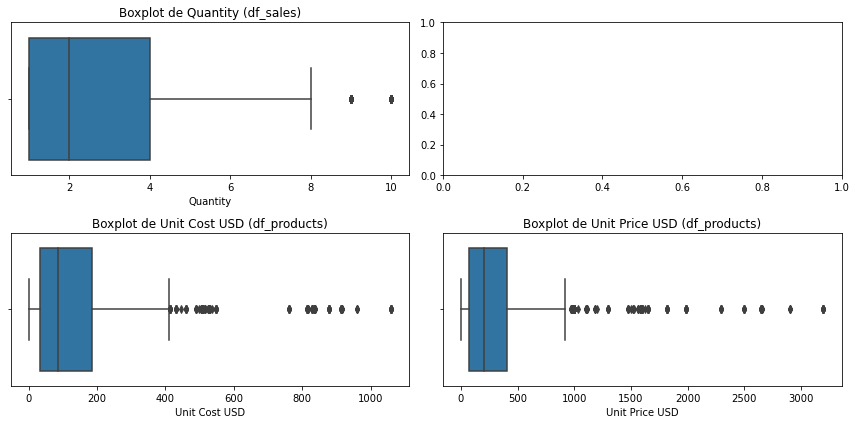

In [33]:
## Verificacion mas visual de los outliers con boxplot:
## Diccionario de columnas a analizar
columnas_outliers = {
    "df_sales": ["Quantity"],
    "df_products": ["Unit Cost USD", "Unit Price USD"]
}

## Crear gráficos
fig, axes = plt.subplots(nrows=len(columnas_outliers), ncols=2, figsize=(12, 6))  ## Creamos una figura con subgráficos
                        ## Una fila por dataset       ## Dos columnas, para comparar Costo con Precio

for i, (dataset, columnas) in enumerate(columnas_outliers.items()):  ## Recorremos cada dataset y sus columnas
    df = globals()[dataset]  # Obtenemos el DataFrame real con globals()
    ## Primera iteracion: i = 0, dataset es df_sales, columna es quantity
    ## Segunda iteracion: i = 1, dataset es df_products, columnas son 2, costo y precio

    for j, columna in enumerate(columnas):  ## Para cada columna dentro del dataset
    ## Para sales, primera iteracion: j = 0 y la columna es quantity
    ## Para products, primera iteracion: j = 0 y columna costo
    ## Para products, segunda iteracion: j = 1 y la columna es precio

        sns.boxplot(x=df[columna], ax=axes[i, j])  ## Creamos un boxplot en la posición correspondiente
        ## Primera fila de graficos - Primer boxplot i = 0 (df_sales) y j= 0 (quantity)
        ## Segunda fila de graficos - Primer boxplot i = 1 (df_products) y j = 0 (costo)
        ## Segunda fila de graficos - Segundo boxplot i = 1 (df_products) y j = 1 (precio)
        
        axes[i, j].set_title(f"Boxplot de {columna} ({dataset})")  ## Título del gráfico

plt.tight_layout()  ## Ajustamos el espacio entre gráficos
plt.show()  ## Mostramos los gráficos


#### <u>**El Boxplot:**</u>
* Permite visualizar claramente los outliers.
* Facilita la toma de decisión sobre qué hacer con los valores atípicos.

### **🧠 Interpretación sobre la Verificación de Outliers**  

* **df_sales - Cantidad de productos vendidos (Quantity)**
    - Los valores atípicos no están extremadamente alejados del resto de los datos.  
    - No se observan valores negativos ni compras excesivas que puedan indicar un error en la captura de datos.  
    - Dado que no hay evidencia clara de que estos valores sean erróneos, prefiero mantenerlos en el análisis.  

* **df_products - Costos y Precios de productos**
    * No existen valores negativos en los precios ni en los costos de los productos.  
    * Existen algunos productos cuyo precio y costo son significativamente más altos, pero esto es esperable en un mercado de electrónica:  
        * Algunos productos pueden ser de gama alta o premium.  
        * El costo de producción puede ser mayor debido a los materiales o tecnología utilizada.  
        * La demanda del mercado y la estrategia de pricing pueden influir en estos valores.  
    * Eliminar estos valores podría hacer que perdamos información importante sobre productos de alto costo y su impacto en las ventas.  

* **Decisión Final**
Mantendre los outliers en ambos datasets, ya que no hay evidencia de que sean errores y podrían contener información valiosa para el análisis.  

---
# **Fase 2: Análisis Exploratorio y Estadístico**
---

## **🎯 Objetivos propuestos para el análisis exploratorio y estadístico:**
Este análisis tiene como propósito responder las siguientes preguntas clave, basadas en el comportamiento de las ventas y los productos de la empresa:
1. **¿Cuándo se venden más productos y por qué?** Identificar tendencias y patrones estacionales en las ventas.
2. **¿Qué productos generan más ingresos y rentabilidad?** Analizar el impacto económico de los productos.
3. **¿Dónde se venden más productos?** Estudiar la distribución geográfica de las ventas.

---
#### 📈 **Análisis de Tendencias y Estacionalidad en las Ventas**
**¿Cómo han evolucionado las ventas a lo largo del tiempo?**

En este apartado se analiza la evolución de las ventas a lo largo del tiempo con el objetivo de detectar:

* Tendencias generales de crecimiento o caída.
* Patrones estacionales (meses de mayor y menor venta).
* Eventos o fenómenos que pudieron impactar las ventas.

La cantidad de productos vendidos se agrupa por mes y se visualiza en gráficos de líneas.

**📅 Gráfico 1 - Evolución de las ventas por mes**

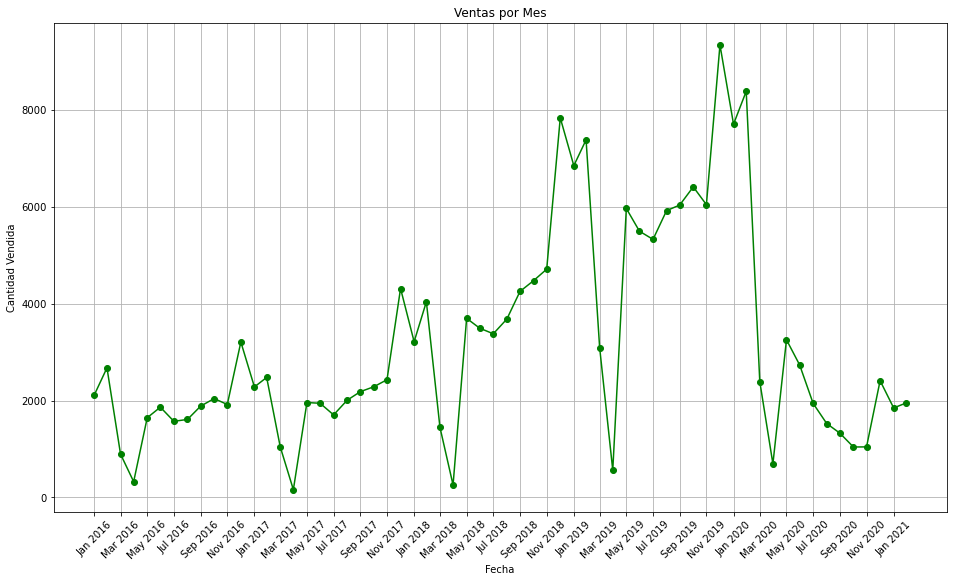

In [34]:
## Agrupar las ventas por mes
ventas_mensuales = df_sales.resample("M", on="Order Date")["Quantity"].sum()
##              Agrupamos por  - Mes cerrado - basado en Order Date - Sumamos la cantidad de pedidos, que sería por mes

## display(ventas_mensuales.index)

## Crear el gráfico
plt.figure(figsize=(16, 9))
plt.plot(ventas_mensuales.index, ventas_mensuales, marker="o", color="green")
##              Meses cerrados      - Cantidad    
## Formatear el eje X para mostrar "Mes Año"
## plt.xticks(ventas_mensuales.index[::3], ventas_mensuales.index[::3].strftime("%b %Y"), rotation=45)

plt.xticks(ventas_mensuales.index[::2], ventas_mensuales.index[::2].strftime("%b %Y"), rotation=45)
## Sirve para modificar un valor        por otro
##          Selecciona el segundo elemento del indice - Convertimos a un formato más legible:
##                                                                                          * %b : Abreviatura del mes
##                                                                                          * %Y : Año 4 digitos

plt.title("Ventas por Mes")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Vendida")
plt.grid() ## Mostrar cuadricula en el grafico
plt.show()

Este gráfico permite observar el comportamiento global de las ventas en todo el periodo analizado, ideal para detectar:

* Meses de mayor o menor volumen de ventas.
* Tendencias generales de crecimiento o caída.

**📅 Gráfico 2 - Comparativa de ventas por mes y año**

Para un análisis más detallado, se compara el comportamiento mensual de las ventas entre los distintos años.

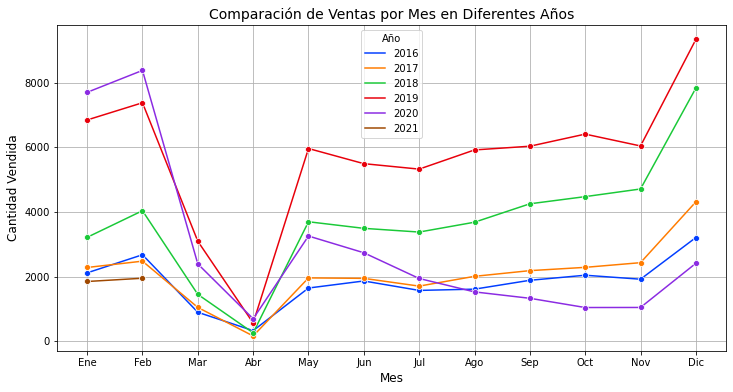

In [35]:
## Agrupamos cantidad de ventas por año y mes
ventas_mensuales = df_sales.groupby(["anho_OD", "mes_OD"])["Quantity"].sum().reset_index()

plt.figure(figsize=(12, 6))

"""
- x = mes (mes_OD)
- y = cantidad total vendida (Quantity)
- hue = año (anho_OD), lo que permite que cada año tenga su propia línea de color
- marker = 'o' coloca puntos en cada valor de la línea
- palette = "bright" para que los colores sean más vivos y se diferencien bien
"""
sns.lineplot(data=ventas_mensuales, 
             x="mes_OD", 
             y="Quantity", 
             hue="anho_OD", 
             marker="o", 
             palette= "bright")

plt.title("Comparación de Ventas por Mes en Diferentes Años", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
## Definimos las etiquetas del eje X, una por cada mes
plt.xticks(ticks=range(1, 13), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
## Mostrar la cuadrícula en el gráfico para facilitar la lectura de los valores
plt.grid()
## Mostrar la leyenda con el título "Año" para identificar cada línea
plt.legend(title="Año")
plt.show()

Este gráfico permite visualizar la estacionalidad con más claridad, observando:

* Qué meses suelen ser los mejores o peores cada año.
* Comparar el desempeño de un mismo mes entre años distintos.
* Detectar anomalías o caídas abruptas.

📊 <u>**Conclusión:** Análisis de Ventas a lo Largo del Tiempo</u>

💸 **Tendencias Principales**

✔ Patrón de estacionalidad claro: Las ventas alcanzan su punto máximo en noviembre y diciembre, impulsadas por:
* Aguinaldo y bonos que aumentan el poder adquisitivo.
* Black Friday y Navidad, momentos clave para compras.
* Regalos de fin de año, lo que aumenta la demanda.

✔ Leve impulso en enero-febrero: Aunque las ventas bajan respecto a diciembre, siguen siendo más altas que otros meses, posiblemente por:

* Reyes Magos, que genera un último pico de compras.
* Poder adquisitivo aún alto tras el aguinaldo y bonos.

✔ Caída pronunciada entre marzo y mayo: Se observa una reducción importante en ventas en este período, lo cual podría explicarse por:

* Gastos escolares al inicio del ciclo escolar.
* Ajuste de presupuesto tras los gastos de fin e inicio de año.

📈 **Crecimiento y Disrupción por la Pandemia** 📉

✔ Crecimiento constante: Se observa que la empresa tenía una tendencia al alza en ventas cada año, alcanzando su mejor desempeño en 2019.

✔ Impacto del COVID-19 en 2020:

* En enero y febrero de 2020, las ventas comenzaron más fuertes que el año anterior.
* Sin embargo, en marzo-mayo, la caída fue más brusca de lo habitual y las ventas no lograron recuperarse al nivel de años anteriores.
* Esto coincide con la pandemia global, que pudo afectar la logística, la demanda y el comportamiento de los clientes.

---
#### 🚀🌙 **Identificar los productos más vendidos y rentables**
El objetivo de este análisis es responder:

* ¿Cuáles son los productos más vendidos?

* ¿Qué productos generan más ingresos?

* ¿Qué productos son los más rentables para la empresa?

##### 📊 **1. Calcular la cantidad de productos más vendidos**

Agrupamos los datos de ventas por producto y sumamos la cantidad vendida. Esto nos permitirá conocer cuáles son los productos que más unidades se han vendido.

In [36]:
## Agrupar por 'Product Key' y sumar la cantidad vendida
productos_mas_vendidos = df_sales.groupby('ProductKey')['Quantity'].sum().sort_values(ascending=False).reset_index()

## Mostrar los 10 productos más vendidos
print("Top 10 productos más vendidos:")
display(productos_mas_vendidos.head(10))

## Tomamos los 10 productos más vendidos:
top_10_mas_vendidos = productos_mas_vendidos.head(10)

Top 10 productos más vendidos:


,ProductKey,Quantity
0,444,550
1,458,538
2,424,521
3,434,521
4,425,520
5,423,514
6,446,509
7,440,507
8,448,505
9,435,505


📈 Visualización: Top 10 productos más vendidos
Se crea un gráfico tipo stripplot para visualizar de forma clara la cantidad de ventas de los 10 productos más populares.

Este gráfico permite identificar rápidamente qué productos tienen mayor rotación en la empresa.

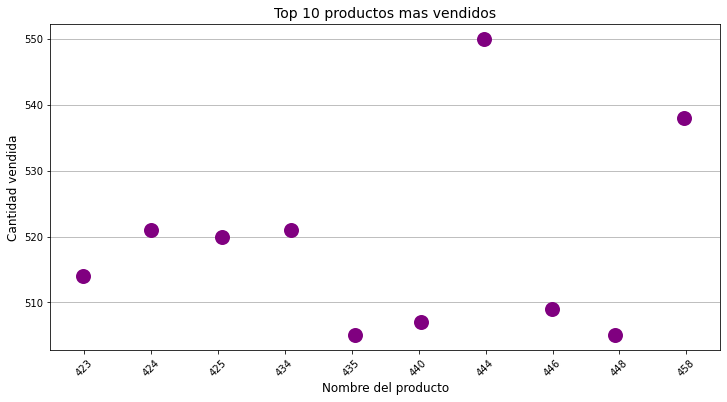

In [37]:
plt.figure(figsize=(12, 6))

## Creamos un gráfico con stripplot, ya que Scatterplot no me generaba los 10 productos en X:
sns.stripplot(x=top_10_mas_vendidos['ProductKey'], 
              y=top_10_mas_vendidos['Quantity'], 
              color="purple", 
              s=15)

plt.xlabel("Nombre del producto", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
plt.title("Top 10 productos mas vendidos", fontsize=14)

plt.xticks(rotation=45)  ## Rotamos etiquetas para que no se encimen
plt.grid(axis="y")  ## Cuadrícula solo en Y para mejor lectura
plt.show()


🔗 Enriqueciendo el análisis: Join con información de productos
Se realiza un merge (left join) con el dataset de productos (df_products) para agregar datos relevantes como:

* Nombre del producto

* Precio unitario

* Costo unitario

* Categoría

Esto permite darle mayor contexto al análisis y visualizar claramente qué productos estamos evaluando.

In [38]:
## Unir con df_products para obtener el nombre de los productos
productos_mas_vendidos = productos_mas_vendidos.merge(df_products[['ProductKey', 'Product Name', 'Unit Cost USD', 'Unit Price USD', 'Category']], on='ProductKey', how='left')
                                    ## Join con df_products, obteniendo product key y product name. 
                                                                            ## La union se produce a traves de Product Key E
                                                                                ## El tipo de union es Left, siendo el principal "productos_mas_vendidos"

## Mostrar los 10 productos más vendidos con nombres
print("Top 10 productos más vendidos con nombres:")
display(productos_mas_vendidos.head(10))

print("Top 10 productos que mas ingresos produce a la empresa:")
display(productos_mas_vendidos.head(10).sort_values(by= ['Unit Price USD'], ascending= False))

## Pruebas:
## display(df_products[df_products['ProductKey'] == 444])
## display(df_products[df_products['ProductKey'] == 446])

Top 10 productos más vendidos con nombres:


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category
0,444,550,WWI Desktop PC2.33 X2330 Black,304.48,919.00,Computers
1,458,538,WWI Desktop PC1.80 E1800 White,117.21,229.90,Computers
2,424,521,Adventure Works Desktop PC1.60 ED160 Black,137.63,269.95,Computers
3,434,521,Adventure Works Desktop PC2.30 MD230 White,275.46,599.00,Computers
4,425,520,Adventure Works Desktop PC1.80 ED180 Black,188.13,369.00,Computers
5,423,514,Adventure Works Desktop PC2.30 MD230 Black,275.46,599.00,Computers
6,446,509,WWI Desktop PC1.60 E1600 Black,112.14,219.95,Computers
7,440,507,WWI Desktop PC1.60 E1600 Silver,112.14,219.95,Computers
8,448,505,WWI Desktop PC1.80 E1801 Black,137.60,269.90,Computers
9,435,505,Adventure Works Desktop PC1.60 ED160 White,137.63,269.95,Computers


Top 10 productos que mas ingresos produce a la empresa:


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category
0,444,550,WWI Desktop PC2.33 X2330 Black,304.48,919.00,Computers
3,434,521,Adventure Works Desktop PC2.30 MD230 White,275.46,599.00,Computers
5,423,514,Adventure Works Desktop PC2.30 MD230 Black,275.46,599.00,Computers
4,425,520,Adventure Works Desktop PC1.80 ED180 Black,188.13,369.00,Computers
2,424,521,Adventure Works Desktop PC1.60 ED160 Black,137.63,269.95,Computers
9,435,505,Adventure Works Desktop PC1.60 ED160 White,137.63,269.95,Computers
8,448,505,WWI Desktop PC1.80 E1801 Black,137.60,269.90,Computers
1,458,538,WWI Desktop PC1.80 E1800 White,117.21,229.90,Computers
6,446,509,WWI Desktop PC1.60 E1600 Black,112.14,219.95,Computers
7,440,507,WWI Desktop PC1.60 E1600 Silver,112.14,219.95,Computers


📊 Visualización: Top 10 productos más vendidos (con nombres)
Graficamos nuevamente el Top 10 para obtener una visualización más legible y contextualizada.

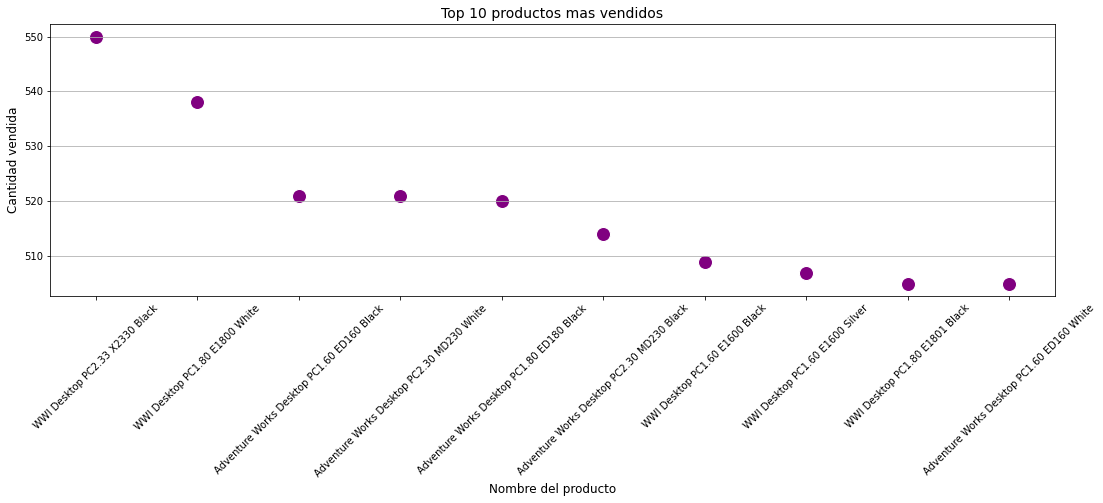

In [39]:
top_10_mas_vendidos = productos_mas_vendidos.head(10)
plt.figure(figsize=(18, 5))
sns.scatterplot(x=top_10_mas_vendidos['Product Name'], 
              y=top_10_mas_vendidos['Quantity'], 
              color="purple", 
              s = 200)

plt.xlabel("Nombre del producto", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
plt.title("Top 10 productos mas vendidos", fontsize=14)

plt.xticks(rotation = 45)  ## Rotamos etiquetas para que no se encimen
plt.grid(axis="y")  ## Cuadrícula solo en Y para mejor lectura
plt.show()

##### 💰 **2. Calcular los productos con mayor ingreso total**

Se calcula el ingreso total por producto mediante la fórmula:

**Ingresos Totales** = Cantidad Vendida * Precio Unitario

Luego se ordenan los productos por mayor ingreso total generado. Esto nos permitirá conocer qué productos son los más valiosos para la empresa en términos de facturación.

In [40]:
## Calcular el ingreso total por producto
productos_mas_vendidos['Ingresos Totales'] = productos_mas_vendidos['Quantity'] * productos_mas_vendidos['Unit Price USD']

## Ordenar los productos por ingreso total
productos_mas_rentables = productos_mas_vendidos.sort_values(by="Ingresos Totales", ascending=False)

## Mostrar los 10 productos con mayor ingreso
print("Top 10 productos con mayor ingreso total:")
display(productos_mas_rentables.head(10).reset_index())


Top 10 productos con mayor ingreso total:


,index,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category,Ingresos Totales
0,0,444,550,WWI Desktop PC2.33 X2330 Black,304.48,919.00,Computers,505450.00
1,13,416,481,Adventure Works Desktop PC2.33 XD233 Silver,321.05,969.00,Computers,466089.00
2,16,428,479,Adventure Works Desktop PC2.33 XD233 Brown,321.05,969.00,Computers,464151.00
3,22,422,462,Adventure Works Desktop PC2.33 XD233 Black,321.05,969.00,Computers,447678.00
4,28,433,451,Adventure Works Desktop PC2.33 XD233 White,321.05,969.00,Computers,437019.00
5,21,455,462,WWI Desktop PC2.33 X2330 White,304.48,919.00,Computers,424578.00
6,23,450,460,WWI Desktop PC2.33 X2330 Brown,304.48,919.00,Computers,422740.00
7,370,147,136,"Adventure Works 52"" LCD HDTV X590 White",960.82,2899.99,TV and Video,394398.64
8,393,146,129,"Adventure Works 52"" LCD HDTV X590 Black",960.82,2899.99,TV and Video,374098.71
9,43,438,392,WWI Desktop PC2.33 X2330 Silver,304.48,919.00,Computers,360248.00


📈 Visualización: Top 10 productos con mayor ingreso total

Se grafica el Top 10 de productos con mayores ingresos, lo que permite visualizar rápidamente aquellos productos que representan una mayor fuente de ingresos para la empresa, independientemente de la cantidad vendida.

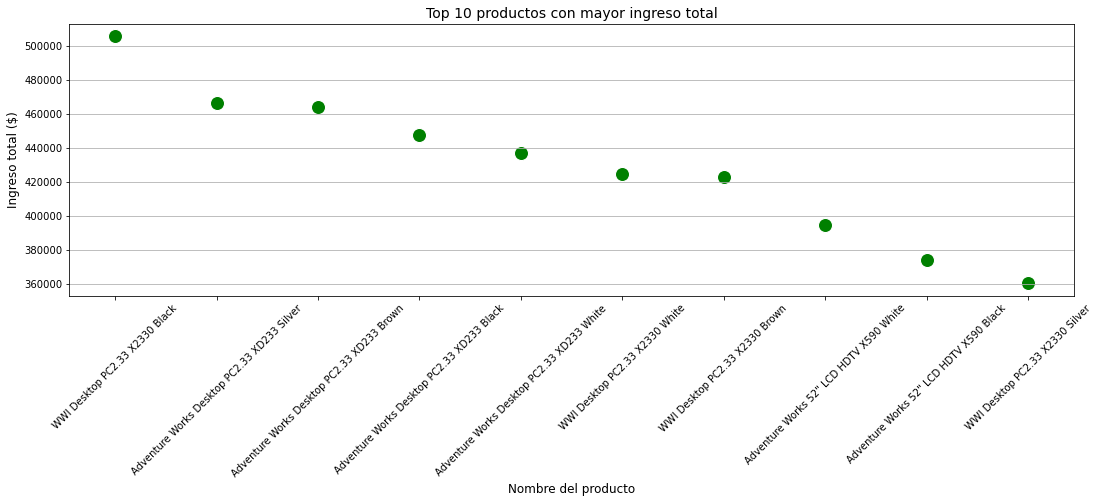

In [41]:
## Tomar los 10 productos con mayor ingreso total
top_10_mas_rentables = productos_mas_rentables.head(10)

## Crear el gráfico
plt.figure(figsize=(18, 5))
sns.scatterplot(x=top_10_mas_rentables['Product Name'], 
                y=top_10_mas_rentables['Ingresos Totales'], 
                color="green", 
                s=200)

plt.xlabel("Nombre del producto", fontsize=12)
plt.ylabel("Ingreso total ($)", fontsize=12)
plt.title("Top 10 productos con mayor ingreso total", fontsize=14)

plt.xticks(rotation=45)  ## Rotamos etiquetas para que no se encimen
plt.grid(axis="y")  ## Cuadrícula solo en Y para mejor lectura
plt.show()

##### 📉 **3. Calcular el margen de ganancia por producto**

Se calcula el margen de ganancia respecto a la venta de cada producto con la siguiente fórmula:

**Margen Ganancia (%)** = ((Precio Unitario - Costo Unitario) / Precio Unitario) * 100

Esto nos ayuda a entender **qué porcentaje de cada venta representa ganancia real para la empresa**.

Se muestran:

* Los productos con mayor margen de ganancia.

* Los productos con menor margen de ganancia.

In [42]:
## Calcular el margen de ganancia respecto a la venta para cada producto
## Para saber qué porcentaje de la venta realizada significa una ganancia para la empresa
productos_mas_rentables["Margen Ganancia %"] = ((productos_mas_rentables["Unit Price USD"] - productos_mas_rentables["Unit Cost USD"]) / productos_mas_rentables["Unit Price USD"]) * 100

## Ordenar por mayor margen de ganancia
productos_mayor_margen = productos_mas_rentables.sort_values(by="Margen Ganancia %", ascending=False)

## Mostrar los 10 productos con mayor margen de ganancia
print("Top 10 productos con mayor margen de ganancia respecto a las ventas:")
display(productos_mayor_margen[productos_mayor_margen["Ingresos Totales"] > 360000])
display(productos_mayor_margen.head(10))
print("Top 10 productos con menor margen de ganancia respecto a las ventas:")
display(productos_mayor_margen.tail(10))

## Verificación de márgenes de ganancia: #
print(productos_mayor_margen["Margen Ganancia %"].describe())

Top 10 productos con mayor margen de ganancia respecto a las ventas:


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category,Ingresos Totales,Margen Ganancia %
0,444,550,WWI Desktop PC2.33 X2330 Black,304.48,919.00,Computers,505450.00,66.868335
21,455,462,WWI Desktop PC2.33 X2330 White,304.48,919.00,Computers,424578.00,66.868335
23,450,460,WWI Desktop PC2.33 X2330 Brown,304.48,919.00,Computers,422740.00,66.868335
43,438,392,WWI Desktop PC2.33 X2330 Silver,304.48,919.00,Computers,360248.00,66.868335
393,146,129,"Adventure Works 52"" LCD HDTV X590 Black",960.82,2899.99,TV and Video,374098.71,66.868162
370,147,136,"Adventure Works 52"" LCD HDTV X590 White",960.82,2899.99,TV and Video,394398.64,66.868162
16,428,479,Adventure Works Desktop PC2.33 XD233 Brown,321.05,969.00,Computers,464151.00,66.867905
13,416,481,Adventure Works Desktop PC2.33 XD233 Silver,321.05,969.00,Computers,466089.00,66.867905
22,422,462,Adventure Works Desktop PC2.33 XD233 Black,321.05,969.00,Computers,447678.00,66.867905
28,433,451,Adventure Works Desktop PC2.33 XD233 White,321.05,969.00,Computers,437019.00,66.867905


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category,Ingresos Totales,Margen Ganancia %
167,1595,277,SV DVD 60 DVD Storage Binder L20 Red,7.58,22.89,"Music, Movies and Audio Books",6340.53,66.885103
185,1640,266,Contoso DVD 60 DVD Storage Binder L20 Red,7.58,22.89,"Music, Movies and Audio Books",6088.74,66.885103
203,1630,254,Contoso DVD 60 DVD Storage Binder L20 Black,7.58,22.89,"Music, Movies and Audio Books",5814.06,66.885103
124,1585,305,SV DVD 60 DVD Storage Binder L20 Black,7.58,22.89,"Music, Movies and Audio Books",6981.45,66.885103
115,1590,310,SV DVD 60 DVD Storage Binder L20 Silver,7.58,22.89,"Music, Movies and Audio Books",7095.90,66.885103
114,1635,311,Contoso DVD 60 DVD Storage Binder L20 Silver,7.58,22.89,"Music, Movies and Audio Books",7118.79,66.885103
814,1359,69,Contoso Centrex Phone System L10 White,14.24,42.99,Cell phones,2966.31,66.876018
960,1392,59,Contoso Centrex Phone System L10 Grey,14.24,42.99,Cell phones,2536.41,66.876018
908,1326,62,Contoso Centrex Phone System L10 Black,14.24,42.99,Cell phones,2665.38,66.876018
980,1328,58,Contoso behind Centrex X15 Black,16.56,49.99,Cell phones,2899.42,66.873375


Top 10 productos con menor margen de ganancia respecto a las ventas:


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category,Ingresos Totales,Margen Ganancia %
272,1685,192,SV Hand Games for kids E30 Yellow,2.75,5.39,Games and Toys,1034.88,48.979592
245,2494,213,Reusable Phone Screen Protector E120,1.50,2.94,Cell phones,626.22,48.979592
224,1703,236,SV Hand Games for kids E30 Silver,2.75,5.39,Games and Toys,1272.04,48.979592
213,1697,250,SV Hand Games for kids E30 Red,2.75,5.39,Games and Toys,1347.50,48.979592
302,2517,175,Contoso In-Line Coupler E180 Silver,1.71,3.35,Cell phones,586.25,48.955224
333,2516,156,Contoso In-Line Coupler E180 Black,1.71,3.35,Cell phones,522.60,48.955224
297,2515,178,Contoso In-Line Coupler E180 White,1.71,3.35,Cell phones,596.30,48.955224
378,2507,132,Contoso Rubberized Snap-On Cover Hard Case Cel...,2.42,4.74,Cell phones,625.68,48.945148
281,2508,188,Contoso Rubberized Snap-On Cover Hard Case Cel...,2.42,4.74,Cell phones,891.12,48.945148
295,2506,180,Contoso Rubberized Snap-On Cover Hard Case Cel...,2.42,4.74,Cell phones,853.20,48.945148


count    2492.000000
mean       54.603629
std         6.424893
min        48.945148
25%        49.018405
50%        54.013062
75%        54.015873
max        66.885103
Name: Margen Ganancia %, dtype: float64


##### 📊 **4. Aplicar la Ley de Pareto (80/20) al análisis de ingresos por producto**

Se aplica la regla de Pareto para comprobar si el 20% de los productos genera el 80% de los ingresos.

Se calcula:

* El porcentaje de ingreso que aporta cada producto.

* La acumulación de ingresos.

In [43]:
print(f"Tenemos una cantidad de {df_products.shape[0]} productos. \nEl 20% de los productos es: {df_products.shape[0] * 0.2}")

## Ordenar productos por ingresos en orden descendente
productos_pareto = productos_mas_rentables.sort_values(by="Ingresos Totales", ascending=False).reset_index(drop=True)

## Calcular el porcentaje de ingreso que representa cada producto
productos_pareto["% Ingreso"] = (productos_pareto["Ingresos Totales"] / productos_pareto["Ingresos Totales"].sum()) * 100

## Calcular la acumulación de ingresos para la regla de Pareto
productos_pareto["% Acumulado"] = productos_pareto["% Ingreso"].cumsum()

## Mostrar los primeros productos para ver los cálculos
display(productos_pareto.head(709))

Tenemos una cantidad de 2517 productos. 
El 20% de los productos es: 503.40000000000003


,ProductKey,Quantity,Product Name,Unit Cost USD,Unit Price USD,Category,Ingresos Totales,Margen Ganancia %,% Ingreso,% Acumulado
0,444,550,WWI Desktop PC2.33 X2330 Black,304.48,919.00,Computers,505450.00,66.868335,0.906548,0.906548
1,416,481,Adventure Works Desktop PC2.33 XD233 Silver,321.05,969.00,Computers,466089.00,66.867905,0.835952,1.742500
2,428,479,Adventure Works Desktop PC2.33 XD233 Brown,321.05,969.00,Computers,464151.00,66.867905,0.832476,2.574976
3,422,462,Adventure Works Desktop PC2.33 XD233 Black,321.05,969.00,Computers,447678.00,66.867905,0.802931,3.377907
4,433,451,Adventure Works Desktop PC2.33 XD233 White,321.05,969.00,Computers,437019.00,66.867905,0.783814,4.161720
...,...,...,...,...,...,...,...,...,...,...
704,1146,34,"Fabrikam Home and vacation moviemaker 1/3"" 8.5...",291.09,633.00,Cameras and camcorders,21522.00,54.014218,0.038601,79.853980
705,1091,60,"Contoso SLR Camera 35"" M358 Silver Grey",164.63,358.00,Cameras and camcorders,21480.00,54.013966,0.038525,79.892506
706,352,67,Fabrikam Laptop8.9 E0800 Silver,163.15,320.00,Computers,21440.00,49.015625,0.038454,79.930959
707,1616,376,Contoso DVD Player M100 Black,26.21,56.99,"Music, Movies and Audio Books",21428.24,54.009475,0.038433,79.969392


⚠️ **Resultado del análisis de Pareto**

El principio de Pareto **no se cumple** en este caso.

Para alcanzar el 80% de los ingresos acumulados, se necesitan 708 productos, superando ampliamente el 20% de los productos (503 productos).

##### ✅ **Conclusión final del análisis de productos: Ventas, Ingresos y Rentabilidad**

**1**. Productos más vendidos (Cantidad de ventas)

* Dominan las computadoras de escritorio, con el modelo WWI Desktop PC2.33 X2330 Black en primer lugar.
* Todos los productos en el Top 10 pertenecen a la categoría de Computadoras, lo que indica que es el segmento más fuerte en términos de demanda.

**2**. Productos con mayor ingreso total (Revenue)

* Aunque las computadoras dominan, algunos productos en la categoría TV and Video generan altos ingresos con menos ventas.
* Ejemplo: Dos modelos de TV con solo 136 y 129 ventas respectivamente, pero con precios de 2899.99 USD y un ingreso total de 374,098.71 USD. Esto sugiere que algunos productos pueden compensar menos ventas con precios más altos.

**3**. Rentabilidad: ¿Cómo se generan las ganancias?

* Para esta empresa, la rentabilidad no está determinada únicamente por la cantidad de ventas, sino por una combinación de precio y volumen de ventas. ## Verificar esto, porque no entiendo sinceramente

* Existen dos estrategias de rentabilidad dentro del negocio:
    * Productos de alto volumen con precios más bajos (Computadoras).
    * Productos de ticket alto con menos ventas pero ingresos elevados (TVs).
* Aunque el Contoso DVD 60 DVD Storage Binder L20 Black tiene el mayor margen de ganancia individual (66.88%), los productos con mayores ingresos también tienen márgenes similares (~66.86%), por lo que en este caso, la cantidad de ventas sigue siendo un factor clave.

**4**. Reflexión Final

Estos hallazgos podrían servir para evaluar si hay oportunidades de aumentar el volumen de ventas en productos de alto precio o identificar segmentos donde estos sean más demandados

---
#### **🌎 Ubicación de las Ventas: ¿Dónde se vende más?**
En este análisis buscamos responder:

* ¿Qué países lideran en volumen de ventas?

* ¿Qué países generan más ingresos?

* ¿Existen diferencias importantes entre el canal físico y el canal online?


##### 📦 **1. Agrupación de ventas por país**
Se agrupan las ventas por país sumando la cantidad total de productos vendidos.

Esto permite identificar rápidamente dónde se concentra la mayor cantidad de ventas.

In [44]:
## Agrupar ventas por país sumando la cantidad vendida
ventas_por_pais = df_sales.merge(df_stores[['StoreKey', 'Country']], on='StoreKey', how='left')
ventas_por_pais = ventas_por_pais.groupby('Country')['Quantity'].sum().reset_index()

## Ordenar de mayor a menor
ventas_por_pais = ventas_por_pais.sort_values(by='Quantity', ascending=False)

## Mostrar los 10 países con más ventas
print("🔝 Top 10 países con más ventas:")
display(ventas_por_pais.head(10))

🔝 Top 10 países con más ventas:


,Country,Quantity
8,United States,83638
6,Online,41311
7,United Kingdom,20625
3,Germany,14880
1,Canada,12991
0,Australia,7085
4,Italy,6986
5,Netherlands,5909
2,France,4332


##### 💰 **2. Agrupación de ingresos por país**
Para entender el impacto económico, se realiza la siguiente operación:

* Se enriquece el dataset de ventas con el precio unitario de cada producto.
* Se calcula el ingreso total por país multiplicando la cantidad vendida por el precio de cada producto.

Este análisis muestra qué países generan mayores ingresos para la empresa.

In [45]:
## Unir df_sales con df_products para obtener el precio de los productos
ventas_con_precios = df_sales.merge(df_products[['ProductKey', 'Unit Price USD']], on='ProductKey', how='left')
## Creamos el df ventas_con_precios para guardar la relación que existe entre la venta de un producto y el costo. Estos datos son guardados en tablas distintas.

## Unir con df_stores para obtener los países de venta
ingresos_por_pais = ventas_con_precios.merge(df_stores[['StoreKey', 'Country']], on='StoreKey', how='left')

## Calcular ingresos totales (Cantidad * Precio Unitario)
ingresos_por_pais['Total USD'] = ingresos_por_pais['Quantity'] * ingresos_por_pais['Unit Price USD']

## Agrupar ingresos por país
ingresos_por_pais = ingresos_por_pais.groupby('Country')['Total USD'].sum().reset_index()

## Ordenar de mayor a menor
ingresos_por_pais = ingresos_por_pais.sort_values(by='Total USD', ascending=False)

## Mostrar los 10 países con más ingresos
print("💰 Top 10 países con más ingresos:")
display(ingresos_por_pais.head(10))


💰 Top 10 países con más ingresos:


,Country,Total USD
8,United States,23764425.86
6,Online,11404324.63
7,United Kingdom,5749769.78
3,Germany,4246279.22
1,Canada,3611561.79
0,Australia,2099141.07
4,Italy,2059086.81
5,Netherlands,1591344.48
2,France,1229545.95


##### 📈 3. Visualización: Comparación de Ventas e Ingresos por País

Se crea un gráfico combinado para comparar dos variables al mismo tiempo:

* Barras azules: Representan los ingresos totales por país.
* Línea morada: Representa la cantidad de productos vendidos.

🔎 ¿Qué logramos con esto?

* Visualizar de forma clara la relación entre cantidad de ventas e ingresos.

* Detectar si algún país tiene pocos productos vendidos pero genera altos ingresos (o viceversa).

* Identificar la importancia del canal online frente a las tiendas físicas.

✅ Detalles técnicos del gráfico:

* Se utiliza doble eje Y:

    * Izquierda: Ingresos Totales (formateado en millones de USD).

    * Derecha: Cantidad Vendida.

* Se aplica transparencia (alpha = 0.7) para mejorar la lectura y no saturar la visualización.

* Las leyendas permiten diferenciar cada métrica fácilmente.

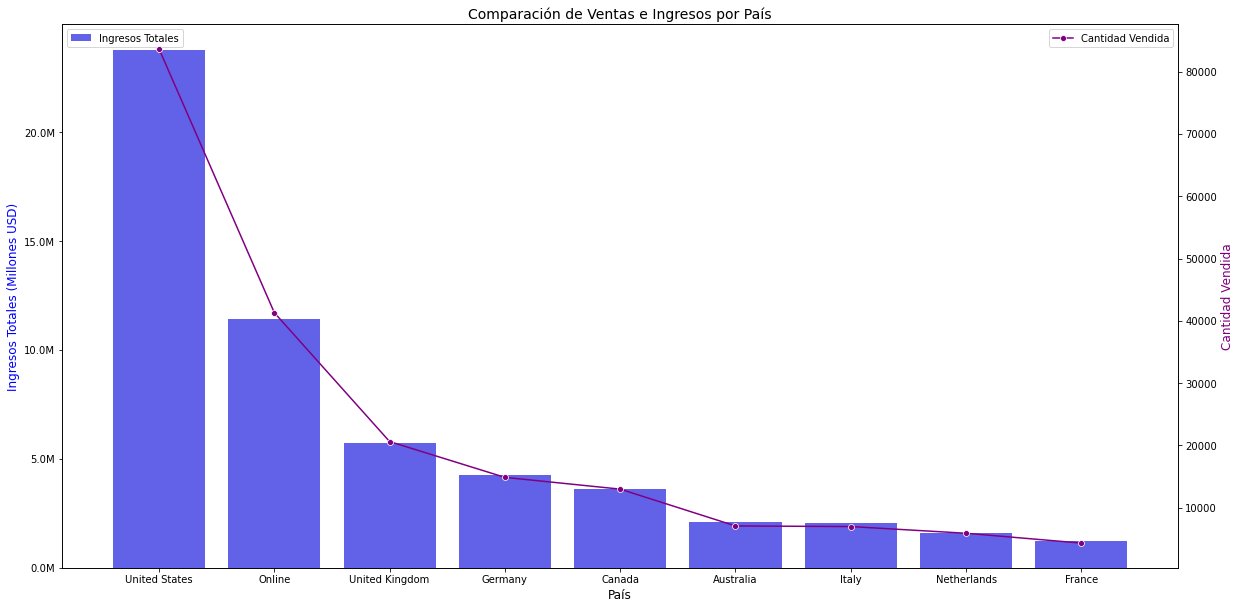

In [46]:
import matplotlib.ticker as mtick  ## Importar para formatear los ejes

ventas_ingresos_pais = ventas_por_pais.merge(ingresos_por_pais, on="Country")

## Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(20, 10))

## Configurar el primer eje Y (Ingresos Totales)
ax1 = sns.barplot(data=ventas_ingresos_pais.head(10), 
                  x="Country", 
                  y="Total USD", 
                  color="blue", 
                  label="Ingresos Totales",
                  alpha = 0.7, 
                  ax=ax1)
ax1.set_ylabel("Ingresos Totales (Millones USD)", 
               fontsize=12, 
               color="blue")

## Formatear el eje Y de ingresos en millones
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

## Crear un segundo eje Y (Cantidad Vendida)
ax2 = ax1.twinx()  ## Crear segundo eje Y compartiendo el eje X
ax2 = sns.lineplot(data=ventas_ingresos_pais.head(10), 
                   x="Country", 
                   y="Quantity", 
                   color="purple", 
                   marker="o", 
                   label="Cantidad Vendida",
                   ax=ax2)
ax2.set_ylabel("Cantidad Vendida", 
               fontsize=12, 
               color="purple")

## Configurar etiquetas y título
plt.title("Comparación de Ventas e Ingresos por País", fontsize=14)
ax1.set_xlabel("País", fontsize=12)

## Rotar etiquetas del eje X
plt.xticks(rotation=45)

## Agregar leyenda combinada
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

## Mostrar el gráfico
plt.show()


📊 Interpretación de Resultados

1️⃣ Los países con más ventas también son los que generan más ingresos.

* La comparación entre cantidad de productos vendidos y total de ingresos muestra que el ranking de los 10 principales países es idéntico en ambas métricas.
* Esto indica que en este negocio, la cantidad de ventas es el principal factor que impulsa los ingresos, y no grandes diferencias en los precios de los productos por región.

2️⃣ Estados Unidos domina las ventas y los ingresos.

* Representa más del doble de ventas e ingresos en comparación con el segundo puesto.
* Su mercado es clave para la empresa y cualquier estrategia debe enfocarse en mantener y expandir su presencia allí.

3️⃣ El canal "Online" está en segundo lugar.

* Esto incluye compras por la web, mostrando la importancia del e-commerce en este negocio.

4️⃣ Las ventas físicas en Estados Unidos superan a las compras en línea a nivel global.

* Si bien el canal Online abarca compras realizadas en todo el mundo, la cantidad de ventas en tiendas físicas solo en Estados Unidos es el doble.

* Esto refuerza que las tiendas físicas siguen siendo clave para la empresa, al menos en este mercado.

🔎 **¿Existe una diferencia significativa entre las ventas físicas y las ventas online?**


Después de observar que **"Online"** aparece como el segundo país con más ventas y que **Estados Unidos** lidera tanto en ventas como en ingresos, surge la necesidad de evaluar estadísticamente si existe una **diferencia real** en el volumen de ventas entre **el canal online** y **las tiendas físicas**.

Para responder a esto, realizamos una **Prueba de Hipótesis - T de Student**, que nos permitirá determinar si la diferencia observada es significativa o si puede deberse al azar.


📑 **Planteamiento de la Prueba T de Student:**

**Hipótesis Nula (H₀):** No hay diferencia significativa en la cantidad de productos vendidos entre tiendas físicas y compras online.

**Hipótesis Alternativa (H₁):** Sí existe una diferencia significativa en la cantidad de productos vendidos entre ambos canales.


In [47]:
## Separar las ventas en dos grupos: "Online" y "Físicas" ##

ventas_online = df_sales[df_sales["StoreKey"] == 0]["Quantity"]
## 'StoreKey == 0' representa las ventas online. Filtramos solo las filas donde la venta se hizo en la tienda "Online".

ventas_fisicas = df_sales[df_sales["StoreKey"] != 0]["Quantity"]
## 'StoreKey != 0' representa todas las ventas en tiendas físicas.

## Prueba de hipótesis: t-test para comparar ventas físicas vs. online ##

t_stat, p_value = ttest_ind(ventas_fisicas, ventas_online, equal_var=False)
## 'equal_var=False' porque las varianzas de los grupos pueden ser diferentes.
## El t-test evalúa si la diferencia entre ambos grupos es significativa o no.

## Mostrar resultados ##
print(f"Estadístico t: {t_stat:.4f}")  
print(f"Valor p: {p_value:.4f}")  

## Nivel de significancia α = 0.05 ##
alpha = 0.05  

if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀): Hay una diferencia significativa entre ventas físicas y online.")  
else:
    print("No se puede rechazar la hipótesis nula (H₀): No hay una diferencia significativa entre ventas físicas y online.")  

Estadístico t: 0.3924
Valor p: 0.6948
No se puede rechazar la hipótesis nula (H₀): No hay una diferencia significativa entre ventas físicas y online.


✅ **Resultado de la Prueba de Hipótesis:**

- **Estadístico t:** 0.3924
- **p-value:** 0.6948

Con un **nivel de significancia α = 0.05**, el resultado muestra que **no se puede rechazar la hipótesis nula (H₀)**.

**Interpretación Final:**
- No existe evidencia suficiente para afirmar que las ventas online sean significativamente diferentes de las ventas físicas en términos de cantidad de productos vendidos.
- La alta variabilidad entre las tiendas físicas y la naturaleza unificada del canal online explican este resultado.

💡 **Insight clave:** Aunque el canal online es el segundo en volumen de ventas, las tiendas físicas siguen siendo relevantes y competitivas. Esto refuerza la estrategia de mantener **ambos canales activos y bien gestionados**.


---
#### 🧠 **Análisis de Correlación entre Precio, Tamaño de la Tienda y Cantidad de Ventas**

Para explorar si existen relaciones entre variables que puedan explicar la cantidad de ventas, se realizó un análisis de correlación entre:

- **Cantidad de productos vendidos**
- **Precio del producto**
- **Tamaño de la tienda (en metros cuadrados)**


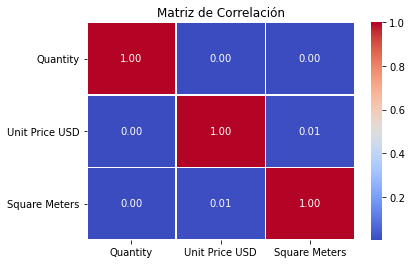

In [48]:
## Unir datasets necesarios
df_corr = df_sales.merge(df_products[['ProductKey', 'Unit Price USD']], on='ProductKey', how='left')
## display(df_corr)
df_corr = df_corr.merge(df_stores[['StoreKey', 'Square Meters']], on='StoreKey', how='left')
## display(df_corr)

## Seleccionar solo columnas numéricas relevantes
df_corr = df_corr[['Quantity', 'Unit Price USD', 'Square Meters']]
## display(df_corr)

## Calcular la matriz de correlación
correlation_matrix = df_corr.corr()
## display(correlation_matrix.head())

## Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()


📈 **Interpretación de la Matriz de Correlación:**

1. Cantidad de productos vendidos ("Quantity")

    * No tiene relación con el precio del producto (0.00) -> Subir o bajar el precio no parece afectar las ventas.
    * No tiene relación con el tamaño de la tienda (0.00) -> Las tiendas más grandes no necesariamente venden más.

2. Precio del producto ("Unit Price USD")

    * Tampoco tiene relación con las ventas (0.00) -> Esto indica que los productos caros o baratos se venden de manera independiente y no hay una tendencia clara de que, por ejemplo, los productos más baratos se vendan más.
    * Tiene una correlación mínima con el tamaño de la tienda (0.01) -> Esta relación es casi nula y no es suficiente para decir que las tiendas más grandes venden productos más caros.

3. Tamaño de la tienda ("Square Meters")

    * No tiene relación con las ventas (0.00) -> Esto nos dice que el tamaño de la tienda no es un factor determinante en la cantidad de productos vendidos.
    * Tiene una correlación insignificante con el precio (0.01) -> Lo que significa que, en teoría, las tiendas más grandes pueden vender productos un poco más caros, pero la relación es tan débil que no es concluyente.

**Conclusión Final**

No se encontraron relaciones fuertes entre las variables analizadas. Esto sugiere que, en este negocio:
- El precio del producto no afecta significativamente las ventas.
- El tamaño de la tienda tampoco tiene un impacto directo en la cantidad de productos vendidos.

Final

In [50]:
df_sales.to_csv('data_clean/sales_clean.csv', index=False)
df_products.to_csv('data_clean/products_clean.csv', index=False)
df_stores.to_csv('data_clean/stores_clean.csv', index=False)
df_customers.to_csv('data_clean/customers_clean.csv', index=False)

---
## ✅ **Conclusión Final del Análisis Exploratorio de Datos**

### 🎯 **Preguntas Clave Respondidas**

1️⃣ **¿Cuándo se venden más productos y por qué?**

✔ **Hallazgo:** Se identificaron patrones estacionales claros:
- Ventas máximas en **noviembre y diciembre** por **Black Friday** y **Navidad**.
- Caída pronunciada entre **marzo y mayo**.

✔ **Conclusión:** La empresa es altamente dependiente de la estacionalidad y debe **planificar estrategias de ventas y marketing** para mitigar los efectos de las temporadas bajas.

---

2️⃣ **¿Qué productos generan más ingresos y rentabilidad?**

✔ **Hallazgo:** 
- Las **computadoras** dominan en cantidad de ventas.
- Productos como **televisores** y otros de alto precio, aunque se vendan menos, generan grandes ingresos por su **alto margen de ganancia**.

✔ **Conclusión:** Se recomienda optimizar la **estrategia de pricing** y fortalecer la **promoción de productos premium**, ya que representan una oportunidad de aumentar la rentabilidad sin necesidad de grandes volúmenes de venta.

---

3️⃣ **¿Dónde se venden más productos?**

✔ **Hallazgo:** 
- **Estados Unidos** lidera ampliamente en ventas e ingresos.
- El canal **Online** es el segundo más importante.
- La prueba T de Student no encontró **diferencias significativas** entre las ventas físicas y online en términos de cantidad vendida.

✔ **Conclusión:** Ambos canales son **igualmente relevantes** y deben seguir fortaleciéndose. Además, **EE.UU. es el mercado clave** y debe ser priorizado en cualquier estrategia de expansión.

---

#### 🧠 **Insights Adicionales del Análisis de Correlación**

✔ No se encontró relación significativa entre:
- **Tamaño de la tienda**
- **Precio de los productos**
- **Cantidad de ventas**

✔ **Conclusión:** Ni el tamaño del local ni el precio impactan en el volumen de ventas. Las decisiones estratégicas deben basarse más en **producto y estacionalidad** que en la infraestructura física.

---

### 📌 **Cierre General del Análisis**
- Se identificaron **tendencias de ventas y patrones estacionales** claros.
- Se analizaron **productos más rentables** y su impacto en los ingresos.
- Se evaluó la **distribución geográfica** y la **importancia de los canales físicos y online**.
- Se aplicaron **técnicas estadísticas y de correlación** para validar las conclusiones.

✅ **Recomendación:** La empresa debe:
- **Optimizar el inventario** en temporada alta.
- **Impulsar ventas de productos premium**.
- **Fortalecer su presencia en USA y el canal online**.
- **Diseñar campañas de marketing específicas** para los meses de baja demanda (marzo-mayo), con el objetivo de estimular las ventas en ese periodo y reducir el impacto de la estacionalidad.

